In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/darknet.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../darknet.zip 

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

C:\Users\Adithia Jo\Desktop\data deteksi\darknet


In [ ]:
# make darknet (build)
!make

chmod +x *.sh

/bin/sh: pkg-config: command not found
/bin/sh: g++: command not found
make: *** [obj/image_opencv.o] Error 127



g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
Makefile:165: recipe for target 'obj/image_opencv.o' failed


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov4/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov4/yolov4_custom.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4/obj.names ./data
!cp /mydrive/yolov4/obj.data  ./data

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov4/generate_train.py ./
!cp /mydrive/yolov4/generate_test.py ./

In [ ]:
# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

Now we simply run the python script to do all the work for us.

In [ ]:
!python generate_train.py
!python generate_test.py

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.862464, GIOU: 0.860577), Class: 0.999752, Obj: 0.994526, No Obj: 0.000865, .5R: 1.000000, .75R: 1.000000, count: 4, class_loss = 0.000065, iou_loss = 0.054132, total_loss = 0.054197 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000001, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 

 1903: 0.016790, 0.023078 avg loss, 0.000010 rate, 2.336430 seconds, 121792 images, 0.180435 hours left
Loaded: 0.000059 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.772282, GIOU: 0.770859), Class: 0.994773, Obj: 0.807897, No Obj: 0.001108, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.009251, iou_loss = 0.032882, total_loss = 0.042133 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

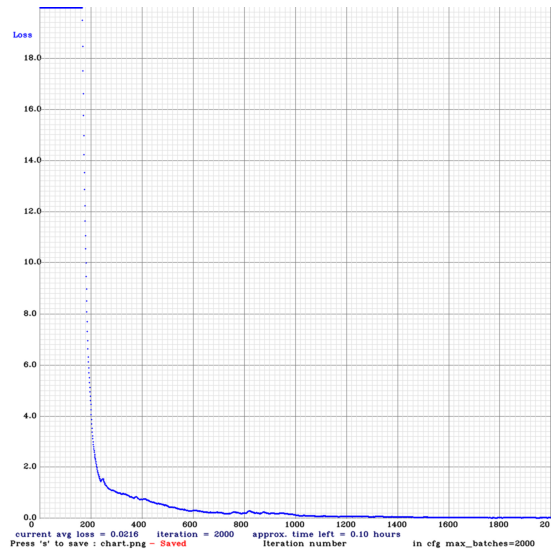

In [ ]:
imShow('chart.png')